<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/mvp-analise-de-dados-e-boas-praticas/MVP_CD_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Pairs Trading Research</h1>
<h2>PUC MVP Exam</h2>
<h3>Yuri Fontoura</h3>

<h3>The purpose of this repository is to research and find the best criptocurrencies for pairs trading based on a given historical data</h3>

Pairs trading strategy involves taking advantage of price discrepancies between two related cryptocurrencies. The basic idea behind pairs trading is to identify two cryptocurrencies that tend to move together in price and then buy the underperforming currency while shorting the overperforming currency.

Here's a step-by-step of how pairs trading strategy works:

<ol>
<li>Identify two correlated cryptocurrencies: The first step is to find two cryptocurrencies that have a strong correlation. This means that when the price of one cryptocurrency moves up, the price of the other cryptocurrency tends to move up as well. For example, Bitcoin and Ethereum are two highly correlated cryptocurrencies.</li>

<li>Validate if the two cryptocurrencies is also cointegrated: Cointegration is a statistical concept that refers to the degree of correlation between two or more cryptocurrencies. In simple terms, cointegration is the extent to which the price movements of two cryptocurrencies are related or move together over time..</li>

<li>Determine the mean and standard deviation of the price ratio: The next step is to calculate the ratio of the two cryptocurrencies' prices. This can be done by dividing the price of one cryptocurrency by the price of the other. Once we have the price ratio, we can calculate the mean and standard deviation of this ratio. The mean represents the long-term average of the ratio, while the standard deviation represents the volatility of the ratio.</li>

<li>Identify entry and exit points: Once we have the mean and standard deviation of the price ratio, we can identify the entry and exit points for our trade. When the price ratio deviates from its mean by a significant amount, it is an indication that the two cryptocurrencies are out of sync. We can use this deviation to enter our trade by buying the underperforming cryptocurrency and shorting the overperforming cryptocurrency. When the price ratio returns to its mean, we can exit our trade and take our profit.</li>

<li>Manage the risk: As with any trading strategy, it's important to manage our risk when trading cryptocurrencies using pairs trading strategy. We can do this by setting stop-loss orders to limit our losses if the price ratio moves against we. We can also use position sizing to control the amount of capital we invest in each trade.</li>

<li>Monitor the trades: Finally, it's important to monitor our trades regularly to ensure that the price ratio is moving in our favor. If the price ratio starts to move against we, we may need to adjust our position or exit our trade altogether.</li>
</ol>

In this introdutory research we will focus on the first three steps of this strategy. We will find the best pairs of cryptocurrencies that are correlated and cointegrated and also find the ratio between them.
The next step is to find the best entry and exit points for each pair. This will be done in a near future.

<h3>1. Run Once </h3> 
install necessary packages.
After that, you need comment the above part of code

In [1]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install matplotlib

<h3>2. Imports </h3>
get classes of this system

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts

<h3>3. Historical Data </h3> 
From cryptocurrencies market

In [3]:
# Get 1 year daily historical data of prices from cryptocurrencies Binance exchange
# From 2022-04-19 to 2023-04-18
hist_df = pd.read_csv('https://raw.githubusercontent.com/Algo-Tradings/pairs-trading-research/main/data/raw/historical_data.csv', header=[0, 1], index_col=0)
hist_df

BTCUSDT                                ETHUSDT                     
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2022-04-19  40801.13  41760.00  40571.00  41493.18  3055.56  3131.00  3030.34  \
2022-04-20  41493.19  42199.00  40820.00  41358.19  3101.74  3166.50  3036.45   
2022-04-21  41358.19  42976.00  39751.00  40480.01  3076.03  3180.00  2942.31   
2022-04-22  40480.01  40795.06  39177.00  39709.18  2983.57  3034.32  2930.35   
2022-04-23  39709.19  39980.00  39285.00  39441.60  2962.39  2978.03  2913.89   
...              ...       ...       ...       ...      ...      ...      ...   
2023-04-14  30373.84  31000.00  29966.00  30466.93  2012.00  2128.76  2009.22   
2023-04-15  30466.93  30595.60  30202.00  30295.09  2099.99  2111.85  2071.13   
2023-04-16  30295.10  30549.99  30120.00  30304.65  2090.61  2141.54  2072.72   
2023-04-17  30304.66  30316.06  29240.65  29430.27  2118.66  2120.51  2056.25   
2023-04-18  29430.27  30485.00  29096.78  30191.26  2073.99  2125.00  2051.00   

                    NEOUSDT         ...   IDUSDT          LOOMUSDT            
              Close    Open   High  ...      Low    Close     Open     High   
Time                                ...                                       
2022-04-19  3101.77   21.30  22.14  ...      NaN      NaN      NaN      NaN  \
2022-04-20  3076.04   22.10  22.19  ...      NaN      NaN      NaN      NaN   
2022-04-21  2983.58   21.49  22.62  ...      NaN      NaN      NaN      NaN   
2022-04-22  2962.39   20.82  21.37  ...      NaN      NaN      NaN      NaN   
2022-04-23  2933.03   21.10  21.43  ...      NaN      NaN      NaN      NaN   
...             ...     ...    ...  ...      ...      ...      ...      ...   
2023-04-14  2099.99   12.47  13.09  ...  0.57244  0.80162  0.06513  0.06619   
2023-04-15  2090.60   12.96  13.11  ...  0.75700  0.82895  0.06599  0.07000   
2023-04-16  2118.67   12.96  14.20  ...  0.80044  0.92936  0.06654  0.06747   
2023-04-17  2074.00   13.58  13.73  ...  0.82520  0.93520  0.06689  0.06690   
2023-04-18  2091.45   12.92  13.22  ...  0.87654  0.92583  0.06532  0.06790   

                             OAXUSDT                          
                Low    Close    Open    High     Low   Close  
Time                                                          
2022-04-19      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-20      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-21      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-22      NaN      NaN     NaN     NaN     NaN     NaN  
2022-04-23      NaN      NaN     NaN     NaN     NaN     NaN  
...             ...      ...     ...     ...     ...     ...  
2023-04-14  0.06452  0.06597  0.2623  0.2741  0.2503  0.2631  
2023-04-15  0.06580  0.06664  0.2633  0.3583  0.2563  0.3271  
2023-04-16  0.06531  0.06683  0.3271  0.5377  0.3200  0.4210  
2023-04-17  0.06491  0.06527  0.4213  0.4555  0.3570  0.3738  
2023-04-18  0.06532  0.06628  0.3738  0.4160  0.3622  0.3716  

[365 rows x 1172 columns]

<h3>4. Cleaning Data </h3>

In [4]:
# Get only close prices from all cryptocurrencies
closes_df = hist_df.loc[:, hist_df.columns.get_level_values(1).isin(['Close'])]

# Remove unnecessary column level
closes_df.columns = closes_df.columns.droplevel(1)

# Replace the NULL values with the value from the previous row
filled_df = closes_df.fillna(method='ffill')

# Remove any cryptocurrency that still have NULL values ( that is not old enough to have 365 days of data)
cleaned_df = filled_df.dropna(how='any', axis=1)
cleaned_df

,BTCUSDT,ETHUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,...,ACAUSDT,XNOUSDT,WOOUSDT,ALPINEUSDT,ASTRUSDT,KDAUSDT,APEUSDT,BSWUSDT,BIFIUSDT,MULTIUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2022-04-19,41493.18,3101.77,22.10,113.80,6.825,0.9520,0.7749,2.646,0.6867,0.2039,...,1.5180,2.141,0.5010,5.4567,0.2195,5.486,13.3739,1.2039,1493.1,12.46
2022-04-20,41358.19,3076.04,21.51,111.90,6.767,0.9370,0.7517,2.764,0.6777,0.2002,...,1.4640,2.115,0.4736,5.8153,0.2138,5.397,16.7269,1.2101,1514.3,13.13
2022-04-21,40480.01,2983.58,20.82,106.80,6.527,0.9100,0.7328,2.505,0.6632,0.1966,...,1.4690,2.042,0.4467,7.2187,0.2118,5.203,14.2885,1.1373,1494.9,11.97
2022-04-22,39709.18,2962.39,21.10,105.40,6.594,0.9060,0.7179,2.457,0.6736,0.1953,...,1.4120,2.054,0.4518,6.0004,0.2060,5.144,15.3693,1.1353,1449.7,11.63
2022-04-23,39441.60,2933.03,20.92,105.10,6.453,0.8860,0.7057,2.404,0.6813,0.1914,...,1.3300,2.071,0.4427,5.9051,0.1911,4.942,16.6921,1.1582,1418.4,11.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,30466.93,2099.99,12.97,96.33,3.331,0.4381,0.5227,1.249,0.2273,0.1069,...,0.1032,0.918,0.3049,3.8629,0.0731,1.011,4.5650,0.1883,518.0,11.35
2023-04-15,30295.09,2090.60,12.96,96.68,3.341,0.4522,0.5192,1.242,0.2251,0.1064,...,0.1023,0.913,0.3321,3.7514,0.0742,1.090,4.5430,0.1894,520.5,11.52
2023-04-16,30304.65,2118.67,13.58,100.01,3.415,0.4513,0.5209,1.238,0.2289,0.1073,...,0.1042,0.948,0.3216,3.7225,0.0738,1.057,4.5280,0.1921,518.9,11.22


<h3>5. Correlated Currencies </h3>
Get the correlation between all the cryptocurrencies

In [5]:
# The correlation is calculated using the daily percentage change for the closing price
log_df = np.log(cleaned_df.pct_change() + 1)

# The correlation between A and B is the same as the correlation between B and A, so we remove duplicated values
corr_df = log_df.corr().unstack().drop_duplicates()

# We also want to see only the cryptocurrencies that have a correlation greater than or equal to 0.83
min_correlation = 0.83

# The correlation between a cryptocurrency and itself is 1, so we remove those values
high_corr_df = corr_df[(corr_df < 1) & (corr_df >= min_correlation)].reset_index()

# Rename the columns
high_corr_df.columns = ['Currency1', 'Currency2', 'Correlation']

high_corr_df


,Currency1,Currency2,Correlation
0,BTCUSDT,ETHUSDT,0.888216
1,BTCUSDT,FUNUSDT,0.844428
2,BTCUSDT,RUNEUSDT,0.837750
3,BTCUSDT,GNOUSDT,0.848386
4,ETHUSDT,FUNUSDT,0.872122
...,...,...,...
61,ALICEUSDT,BAKEUSDT,0.846141
62,TLMUSDT,BAKEUSDT,0.845834
63,TLMUSDT,SLPUSDT,0.851317
64,WAXPUSDT,POWRUSDT,0.864852


<h3>6. Cointegrated Currencies </h3>
Get the cointegration between pairs of highest correlated currencies

In [6]:
# The cointegration is calculated using the daily closing price
def get_ts_coint(currency1, currency2):

    # The cointegration test returns 3 values: t-statistic, p-value and critical values
    ts_coint = ts.coint(cleaned_df[currency1], cleaned_df[currency2])

    # We are interested in the t-statistic against critical values, so we return they
    return ts_coint[0], ts_coint[2][0]

# Create a new dataframe with the same columns as the high correlation dataframe
coint_df = high_corr_df

# Calculate the cointegration for each pair of currencies
(cointegration, critical) = np.vectorize(get_ts_coint)(high_corr_df['Currency1'], high_corr_df['Currency2'])

# Add the cointegration and critical values to the dataframe
coint_df['Cointegration'] = cointegration
coint_df['Criticals'] = critical

# Remove the pairs that are not cointegrated
# The cointegration value must be less than the critical value
coint_df = coint_df[(coint_df['Cointegration'] < coint_df['Criticals'])]

coint_df

,Currency1,Currency2,Correlation,Cointegration,Criticals
22,IOTAUSDT,ZENUSDT,0.832612,-4.588881,-3.926781
27,THETAUSDT,ALICEUSDT,0.851207,-4.112651,-3.926781
34,ENJUSDT,WAXPUSDT,0.845261,-5.504861,-3.926781
41,IOTXUSDT,ALICEUSDT,0.843327,-4.080353,-3.926781
42,IOTXUSDT,TLMUSDT,0.836620,-4.805823,-3.926781
45,STMXUSDT,WAXPUSDT,0.838599,-5.664556,-3.926781
47,COMPUSDT,AAVEUSDT,0.833413,-4.104110,-3.926781
49,MANAUSDT,SANDUSDT,0.891425,-4.170537,-3.926781
52,RUNEUSDT,UNIUSDT,0.843937,-4.929653,-3.926781


<h3>7.Finishing Research and Preparing for Backtest</h3>
Shows a list of pairs that is potentially profitable and its ratio

In [7]:
# Calculate the ratio between the two currencies
def get_ratio(currency1, currency2):

    # The ratio is calculated using the median of the closing price of currency1 divided by the median of the closing price of currency2
    return cleaned_df[currency1].median() / cleaned_df[currency2].median()

# Calculate the ratio for each pair of currencies
ratio = np.vectorize(get_ratio)(coint_df['Currency1'], coint_df['Currency2'])

# Add the ratio to the dataframe and sort it by correlation
researched_df = coint_df.assign(Ratio=ratio).sort_values(by='Correlation', ascending=False)

researched_df


,Currency1,Currency2,Correlation,Cointegration,Criticals,Ratio
49,MANAUSDT,SANDUSDT,0.891425,-4.170537,-3.926781,0.865420
27,THETAUSDT,ALICEUSDT,0.851207,-4.112651,-3.926781,0.620324
34,ENJUSDT,WAXPUSDT,0.845261,-5.504861,-3.926781,5.520958
52,RUNEUSDT,UNIUSDT,0.843937,-4.929653,-3.926781,0.275689
41,IOTXUSDT,ALICEUSDT,0.843327,-4.080353,-3.926781,0.015930
45,STMXUSDT,WAXPUSDT,0.838599,-5.664556,-3.926781,0.082814
42,IOTXUSDT,TLMUSDT,0.836620,-4.805823,-3.926781,1.251316
47,COMPUSDT,AAVEUSDT,0.833413,-4.104110,-3.926781,0.625436
22,IOTAUSDT,ZENUSDT,0.832612,-4.588881,-3.926781,0.019034


<h3>8. Visualization</h3>
The best pair of currencies we found

<h4>8.1. Correlation of cryptocurrency pairs over the time</h4>

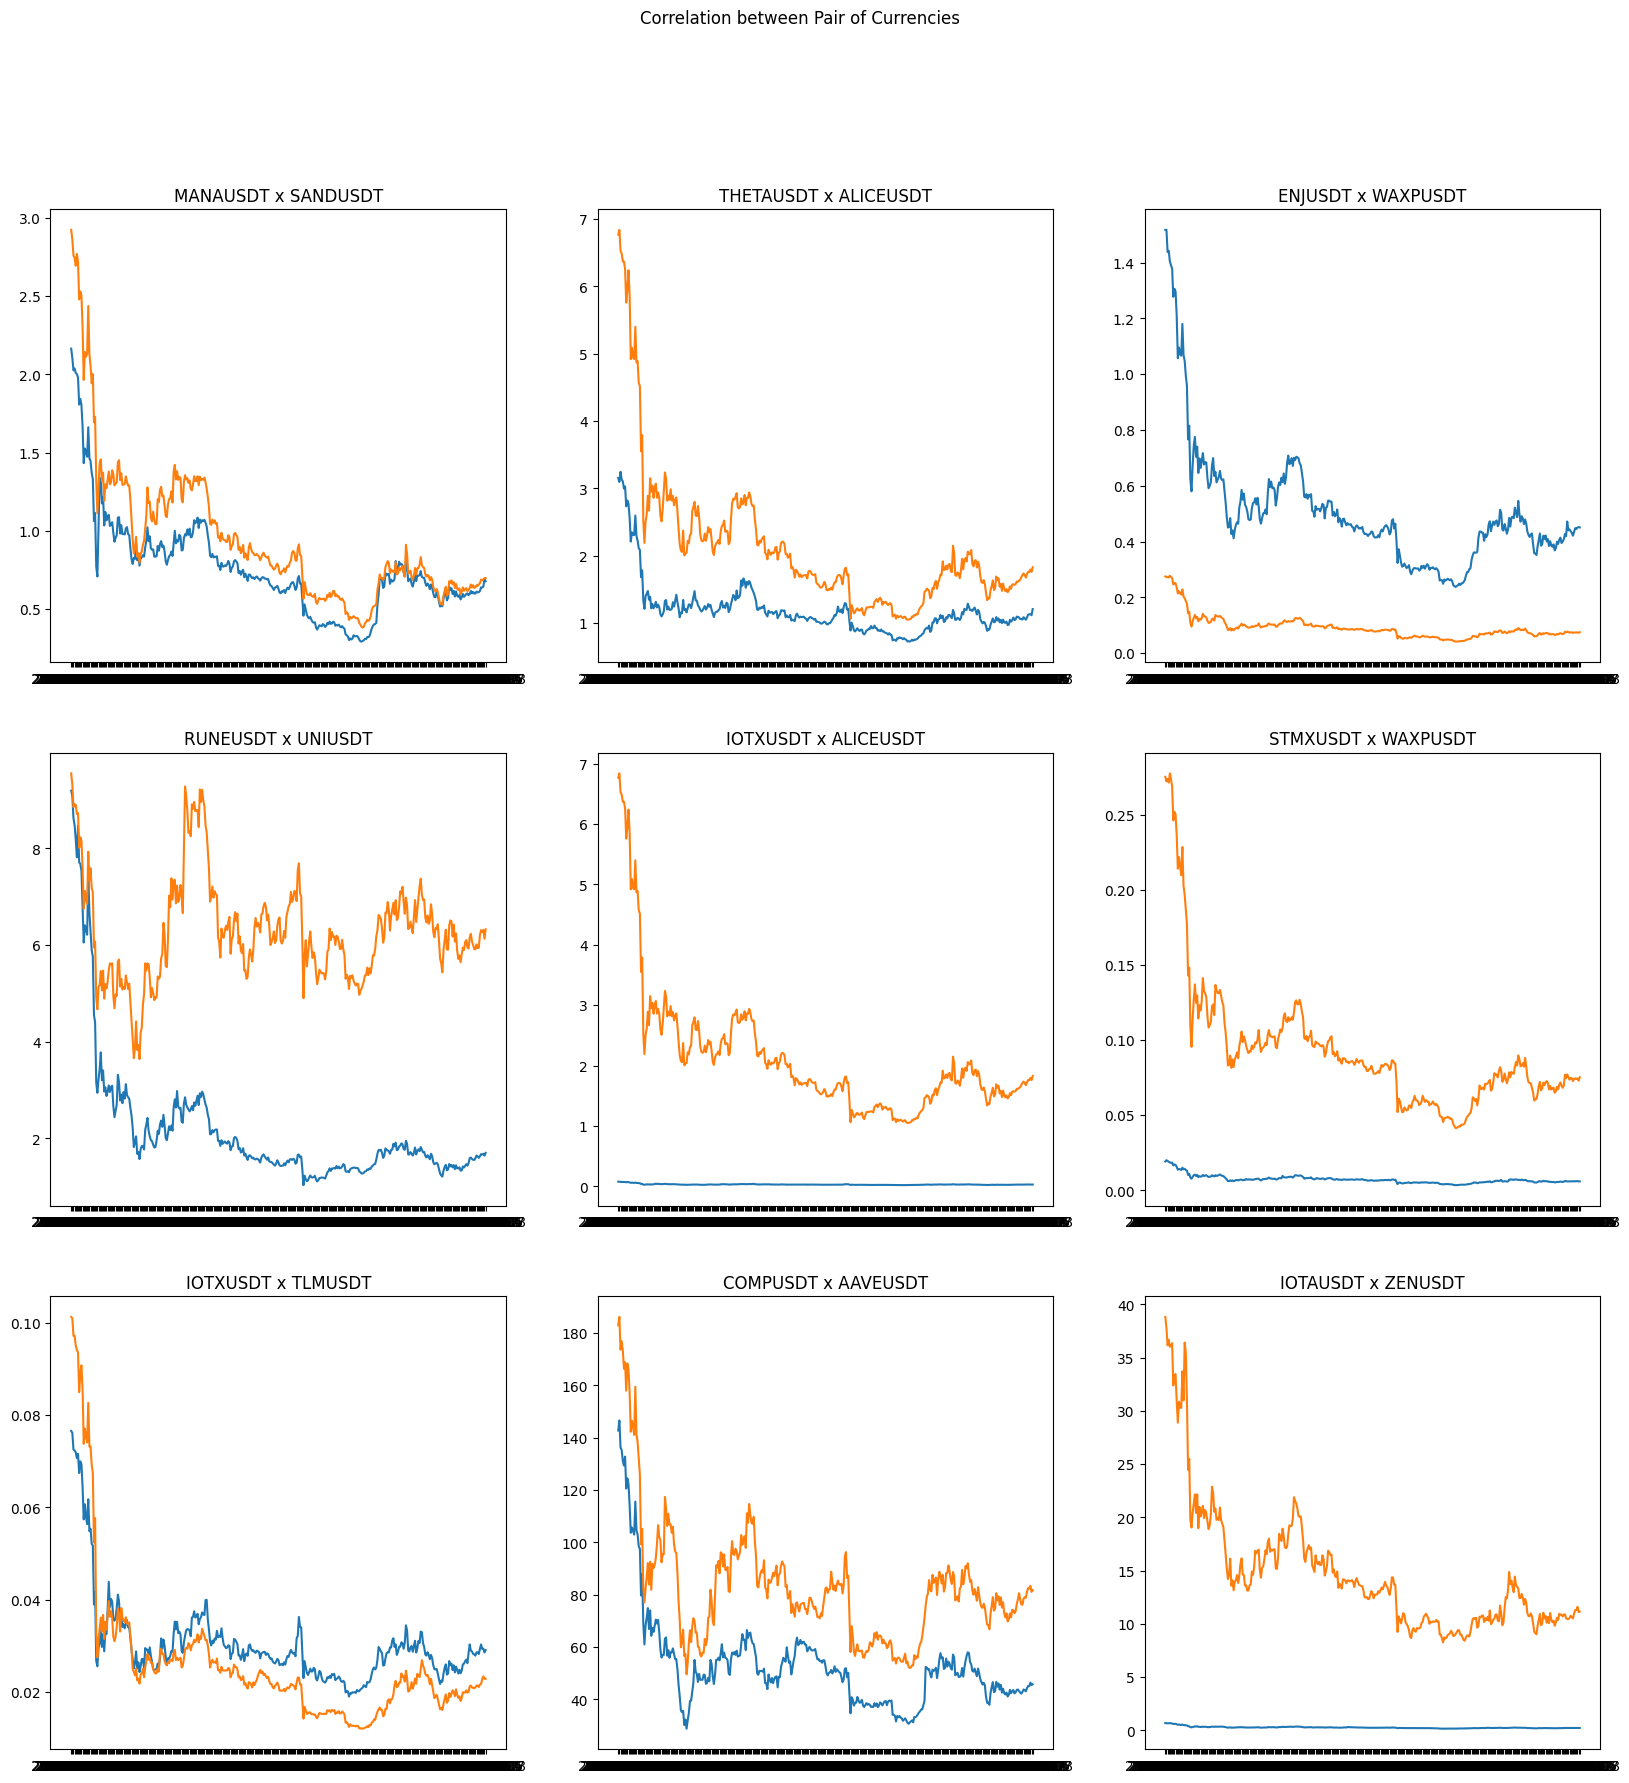

In [38]:
# Create a figure with 2 columns and as many rows as pairs of currencies we have
fig, axs = plt.subplots(nrows=int(len(researched_df.index)/3), ncols=3, figsize=(20, 20))

# Add a title to the figure
fig.suptitle('Correlation between Pair of Currencies')

for i in range(len(researched_df.index)):

    # Get the closing price of researched currency1
    x=cleaned_df[researched_df.iloc[i]['Currency1']]

    # Set the type of plot and its correct position
    axs[int(i/3), i%3].plot(cleaned_df.index, x)

    # Get the closing price of researched currency2
    y=cleaned_df[researched_df.iloc[i]['Currency2']]

    # Set the type of plot and its correct position
    axs[int(i/3), i%3].plot(cleaned_df.index, y)

    # Add a title to each plot
    axs[int(i/3), i%3].set_title(researched_df.iloc[i]['Currency1'] + ' x ' + researched_df.iloc[i]['Currency2'])

# Show the linear cointegration between the pairs of currencies
plt.show()
plt.show()

<i> Even the price of the currencies are not closer, the correlation between them is high because of percentage change of each currency. </i>

<h4>8.2. Linear Cointegration Between Pairs</h4>

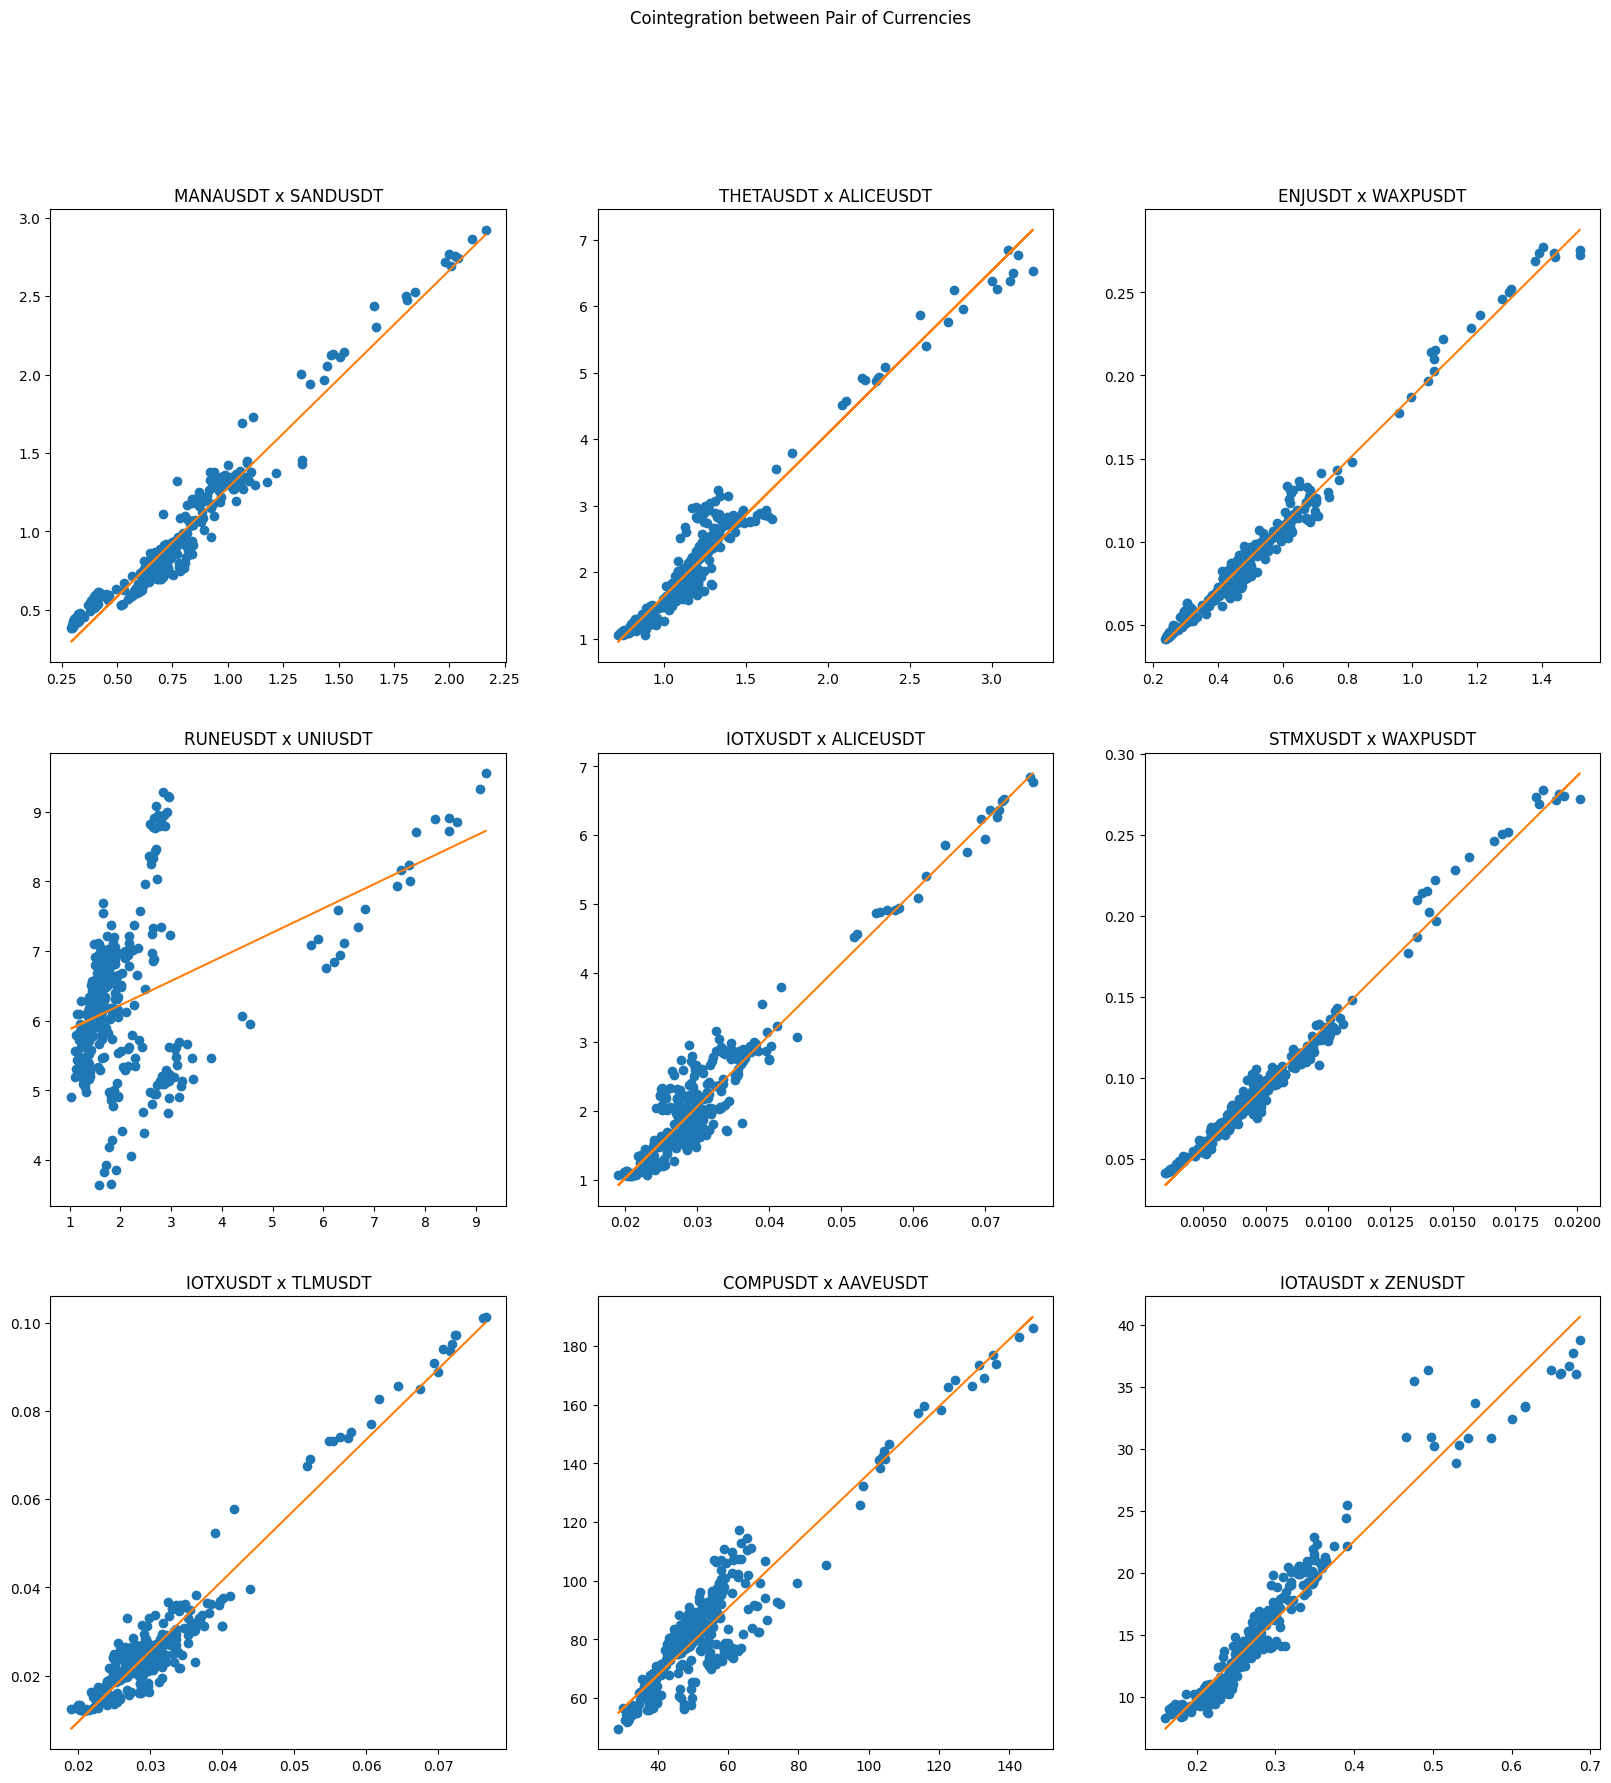

In [31]:
# Create a figure with 2 columns and as many rows as pairs of currencies we have
fig, axs = plt.subplots(nrows=int(len(researched_df.index)/3), ncols=3, figsize=(20, 20))

# Add a title to the figure
fig.suptitle('Cointegration between Pair of Currencies')

for i in range(len(researched_df.index)):
    # Get the closing price of researched currency1
    x=cleaned_df[researched_df.iloc[i]['Currency1']]

    # Get the closing price of researched currency2
    y=cleaned_df[researched_df.iloc[i]['Currency2']]

    # Set the type of plot and its correct position
    axs[int(i/3), i%3].plot(x, y, 'o')

    # Calculate the linear regression between the closing prices of currency1 and currency2
    m, b = np.polyfit(x, y, 1)

    # Add the linear regression to the plot
    axs[int(i/3), i%3].plot(x, m*x+b)

    # Add a title to each plot
    axs[int(i/3), i%3].set_title(researched_df.iloc[i]['Currency1'] + ' x ' + researched_df.iloc[i]['Currency2'])

# Show the linear cointegration between the pairs of currencies
plt.show()

<i> As long as the circles is closer to the fitline (orange), the cointegration is stronger. By this first analysis, maybe the only that is not useful for pairs trading is RUNEUSDT x UNIUSDT because of high gap between the circles and the line.</i>

<h3>9. Considerations</h3>
In this research we clearly saw that some currencies are higly correlated and cointegrated. That way, by using them for pairs trading strategy, we have a huge potencial to make consistent profits.

<i>The next step is to validate entry and exit points applying machine learning for backtest, get the best entry and exit positions point, and also to manage risk.</i>


<h3>Thank you for your time!</h3>